In [1]:
import os
import sys
#sys.path.insert(1, '../Src/')
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

PATH_DATA = '../../Data/'

np.random.seed(42)

%matplotlib inline

In [2]:
fname = "stringer_spontaneous.npy"
fname =os.path.join(PATH_DATA,fname)

In [3]:
# @title Data loading
dat = np.load(fname, allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


# neural activity vs run

In [4]:
dat['sresp'].shape

(23589, 4598)

In [5]:
X = dat['sresp'].T
X.shape

(4598, 23589)

In [6]:
X[0]

array([53.48326111, 20.51850319,  0.        , ...,  0.        ,
       16.47986794,  7.97379541])

In [7]:
y = dat['run']

In [8]:
y[0]

4.9906616

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (3218, 23589)
Test  :  (1380, 23589)


In [10]:
my_model_LR = LinearRegression()

In [11]:
my_model_LR.fit(X_train,y_train)

LinearRegression()

In [12]:
y_train_pred      = my_model_LR.predict(X_train)

metric_train_R2   = my_model_LR.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 1.0
metric_train_RMSE: 1.9644527759042475e-13


In [13]:
y_test_pred      = my_model_LR.predict(X_test)

metric_test_R2   = my_model_LR.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.853589581710713
metric_test_RMSE: 7.111019997060667


## temporal split

In [14]:
n = int(len(X)*0.3)

X_train = X[:-n]
y_train = y[:-n]

X_test  = X[-n:]
y_test  = y[-n:]

print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (3219, 23589)
Test  :  (1379, 23589)


In [15]:
my_model_LR_2 = LinearRegression()
my_model_LR_2.fit(X_train,y_train)

LinearRegression()

In [16]:
y_train_pred      = my_model_LR_2.predict(X_train)

metric_train_R2   = my_model_LR_2.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 1.0
metric_train_RMSE: 1.3032974651691076e-13


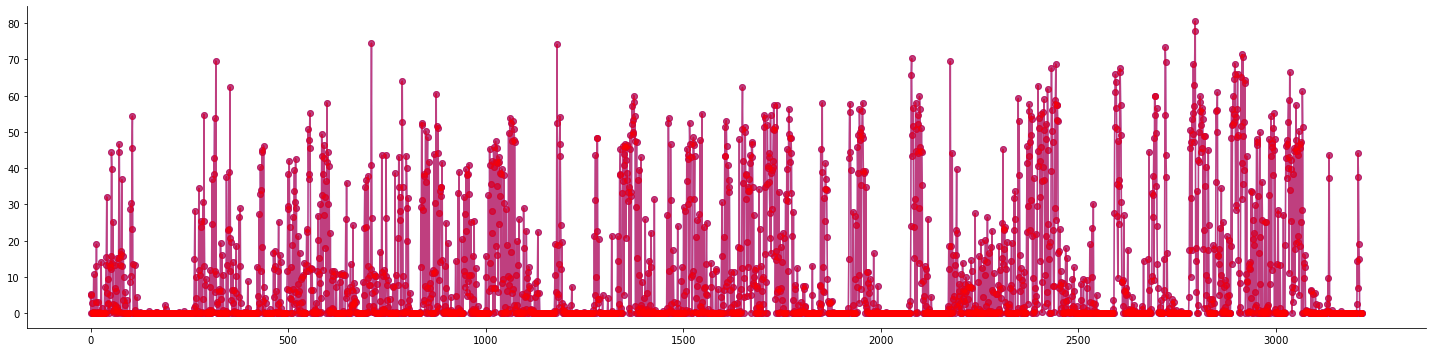

In [17]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


In [18]:
y_test_pred      = my_model_LR_2.predict(X_test)

metric_test_R2   = my_model_LR_2.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.8022082080737782
metric_test_RMSE: 9.567394048826605


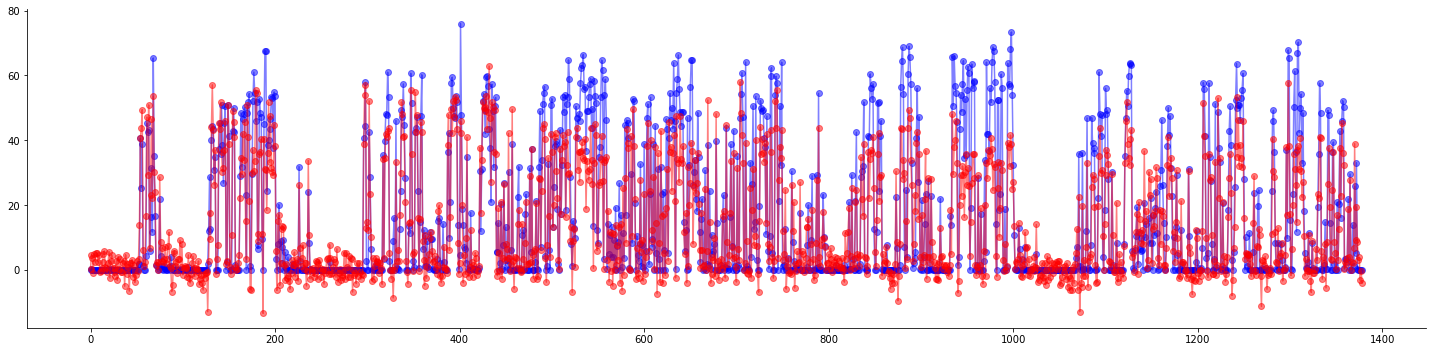

In [19]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)


## Linear Regression with positive and negative coefficients

In [20]:
my_model_LR_3 = LinearRegression(positive=False)
my_model_LR_3.fit(X_train,y_train)

LinearRegression()

metric_train_R2  : 1.0
metric_train_RMSE: 1.2509493992319488e-13


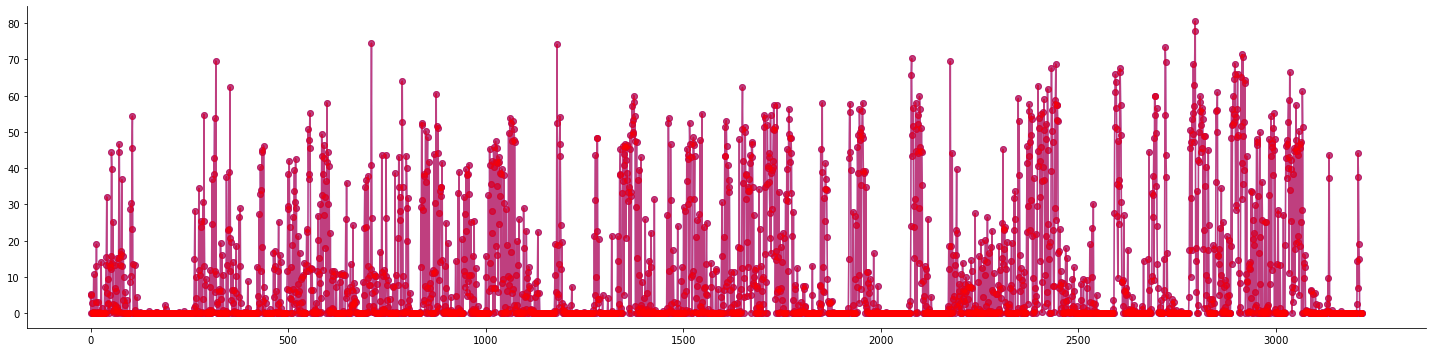

In [21]:
y_train_pred      = my_model_LR_3.predict(X_train) # metric_train_RMSE: 2.4037369030804003e-05


y_train_pred[y_train_pred<=0] = 0  # metric_train_RMSE: 2.196909835364599e-05


metric_train_R2   = my_model_LR_3.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


metric_test_R2  : 0.8022082080737782
metric_test_RMSE: 9.401079493232347


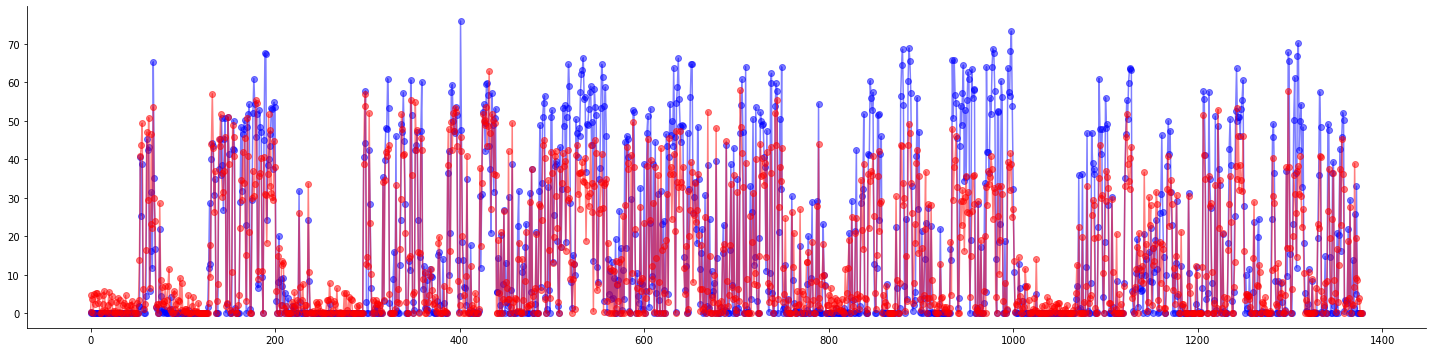

In [22]:
y_test_pred      = my_model_LR_3.predict(X_test) # metric_test_RMSE: 5.73526388441703

y_test_pred[y_test_pred<=0] = 0 #metric_test_RMSE: 5.5218955408988


metric_test_R2   = my_model_LR_3.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)


## Linear Regression with positive coefficients

In [23]:
my_model_LR_4 = LinearRegression(positive=True)# POSITIVE = False
my_model_LR_4.fit(X_train,y_train)

LinearRegression(positive=True)

metric_train_R2  : 0.9219014440623762
metric_train_RMSE: 4.4197056543481


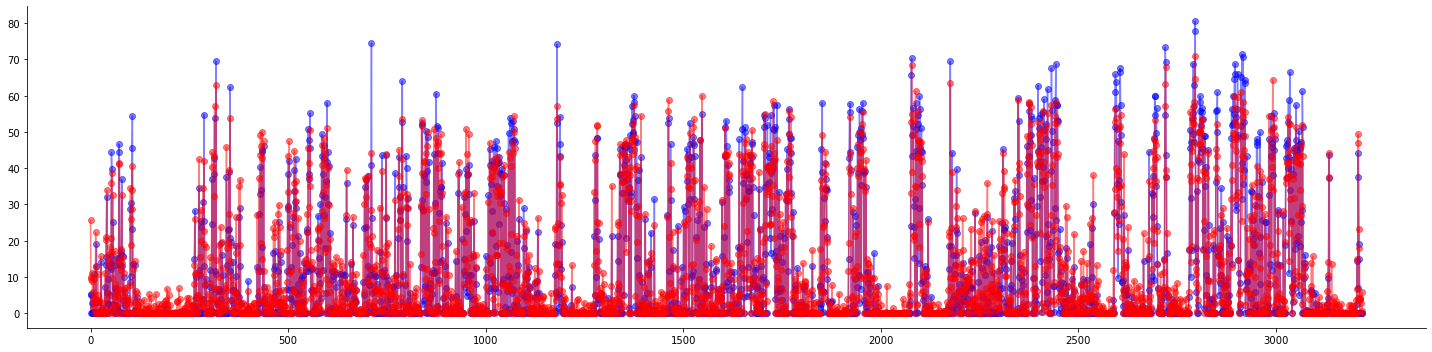

In [24]:
y_train_pred      = my_model_LR_4.predict(X_train) # metric_train_RMSE: 3.4507370216426407

y_train_pred[y_train_pred<=0] = 0  # metric_train_RMSE: 3.1267633565389388


metric_train_R2   = my_model_LR_4.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


metric_test_R2  : 0.7472640632800532
metric_test_RMSE: 10.608723930102032


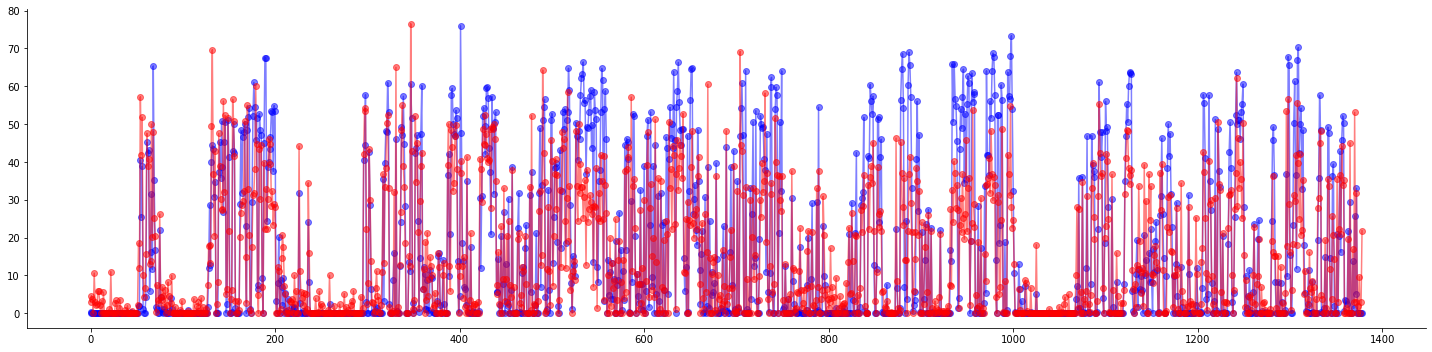

In [25]:
y_test_pred      = my_model_LR_4.predict(X_test) # metric_test_RMSE: 5.73526388441703

y_test_pred[y_test_pred<=0] = 0 #metric_test_RMSE: 5.5218955408988


metric_test_R2   = my_model_LR_4.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)


In [29]:
####Cross Validation Function 

def cross_validate(x_train, y_train, n_splits, X_test, y_test):
    """ Compute MSE for k-fold validation for each order polynomial

    Args:
    x_train (ndarray): training data input vector of shape (n_samples)
    y_train (ndarray): training vector of measurements of shape (n_samples)
    max_order (scalar): max order of polynomial fit
    n_split (scalar): number of folds for k-fold validation

    Return:
    ndarray: MSE over splits for each model order, shape (n_splits, max_order + 1)

    """

  # Initialize the split method
    kfold_iterator = KFold(n_splits)

  # Initialize np array mse values for all models for each split
  #mse_all = np.zeros((n_splits, 1))
  
    metric_train_rmse_arr= []
    metric_test_rmse_arr= []

    for i_split, (train_indices, val_indices) in enumerate(kfold_iterator.split(x_train)):

      # Split up the overall training data into cross-validation training and validation sets
      x_cv_train = x_train[train_indices]
      y_cv_train = y_train[train_indices]
      x_cv_val = x_train[val_indices]
      y_cv_val = y_train[val_indices]
    
      y_train_pred = my_model_LR_2.predict(x_cv_train) # metric_train_RMSE: 2.4037369030804003e-05


      y_train_pred[y_train_pred<=0] = 0  # metric_train_RMSE: 2.196909835364599e-05


      metric_train_R2   = my_model_LR_2.score(x_cv_train, y_cv_train)
      metric_train_RMSE_val = mean_squared_error(y_cv_train, y_train_pred, squared=False)
      metric_train_rmse_arr.append(metric_train_RMSE_val)
      

      #print("metric_train_R2  :", metric_train_R2)
      print("metric_train_RMSE:",metric_train_RMSE_val)

      fig = plt.figure(figsize=(20,10))


     # plt.subplot(2,1,1)
     # plt.plot(range(len(y_cv_train)),y_cv_train,'-bo',alpha=0.5,label='real values')
     # plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5,label='predicted values')

     # plt.legend(loc="upper left")
     # plt.title('Training data :  RMSE = '+str(np.round(metric_train_RMSE_val,2)))
      #plt.show()


      y_test_pred      = my_model_LR_2.predict(x_cv_val) # metric_test_RMSE: 5.73526388441703

      y_test_pred[y_test_pred<=0] = 0 #metric_test_RMSE: 5.5218955408988


      metric_test_R2   = my_model_LR_2.score(x_cv_val, y_cv_val)
      metric_test_RMSE_val = mean_squared_error(y_cv_val, y_test_pred, squared=False)

      #print("metric_test_R2  :",metric_test_R2)
      print("metric_test_RMSE:", metric_test_RMSE_val)
      
      metric_test_rmse_arr.append(metric_test_RMSE_val)
        
      #plt.subplot(2,1,2)
      #plt.plot(range(len(y_cv_val)),y_cv_val,'-bo',alpha=0.5,label='real values')
      #plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5,label='predicted values')
      #plt.title('Testing data : RMSE = '+str(np.round(metric_test_RMSE_val,2)))
      #plt.legend(loc="upper left")

     # plt.suptitle('Linear Regression with positive coefficients')
     # plt.show()
    
      y_test_pred      = my_model_LR_2.predict(X_test)
      
      metric_test_R2_act   = my_model_LR_2.score(X_test, y_test)
      metric_test_RMSE_act = mean_squared_error(y_test, y_test_pred, squared=False)
      print("metric_test_RMSE_act:", metric_test_RMSE_act)
      
    




    return metric_train_rmse_arr, metric_test_rmse_arr




In [30]:
from sklearn.model_selection import KFold

In [31]:
n= 10
train_rmse, test_rmse= cross_validate(X_train,y_train, n, X_test, y_test)

metric_train_RMSE: 1.2786426358679502e-13
metric_test_RMSE: 1.4112802596232758e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.277337429123042e-13
metric_test_RMSE: 1.421874239334838e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.294756899872611e-13
metric_test_RMSE: 1.2722518617005107e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.3033083653108998e-13
metric_test_RMSE: 1.1911080595076546e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.2888682982403815e-13
metric_test_RMSE: 1.3249539642451775e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.293259178598281e-13
metric_test_RMSE: 1.2858840937623582e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.315936687165128e-13
metric_test_RMSE: 1.058844231301482e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.295080108815604e-13
metric_test_RMSE: 1.2692887271310658e-13
metric_test_RMSE_act: 9.567394048826605
metric_train_RMSE: 1.28

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>